# Mini Project 3: Unsupervised Discovery
## Credit Card Customer Segmentation Analysis

**Dataset:** Credit Card Customer Segmentation

**Business Context:** A bank wants to segment credit card customers based on their 6-month usage behavior to develop targeted product offerings and marketing strategies.

**Analysis Approach:**
1. Clustering Analysis - Identify natural customer segments
2. Dimensionality Reduction - Visualize high-dimensional patterns
3. Anomaly Detection - Identify unusual customer behavior
4. Integrated Analysis - Synthesize findings for business recommendations

## 1. Data Loading and Exploration

In [39]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import IsolationForest
from sklearn.metrics import silhouette_score, silhouette_samples
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

In [40]:
# Load the dataset
df = pd.read_csv('../data/CC_GENERAL.csv')

print(f"Dataset Shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

Dataset Shape: (8950, 18)

First few rows:


CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [41]:
# Dataset information
print("Dataset Info:")
df.info()

print("\nBasic Statistics:")
df.describe()

Dataset Info:
<class 'pandas.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   str    
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PUR

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [42]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values[missing_values > 0])
print(f"\nTotal missing values: {df.isnull().sum().sum()}")
print(f"Percentage of missing data: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100):.2f}%")

Missing Values:
CREDIT_LIMIT          1
MINIMUM_PAYMENTS    313
dtype: int64

Total missing values: 314
Percentage of missing data: 0.19%


## 2. Data Preprocessing

In [43]:
# Handle missing values
# MINIMUM_PAYMENTS has missing values - we'll impute with median
# CREDIT_LIMIT also has one missing value

print("Before imputation:")
print(df[['MINIMUM_PAYMENTS', 'CREDIT_LIMIT']].isnull().sum())

# Impute missing values with median (more robust to outliers)
# IMPORTANT: Need to use loc or assign back to df for changes to take effect
df.loc[:, 'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median())
df.loc[:, 'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median())

print("\nAfter imputation:")
print(df[['MINIMUM_PAYMENTS', 'CREDIT_LIMIT']].isnull().sum())

# Verify no missing values remain
print(f"\nTotal missing values after preprocessing: {df.isnull().sum().sum()}")

Before imputation:
MINIMUM_PAYMENTS    313
CREDIT_LIMIT          1
dtype: int64

After imputation:
MINIMUM_PAYMENTS    0
CREDIT_LIMIT        0
dtype: int64

Total missing values after preprocessing: 0


In [44]:
# Prepare data for clustering
# Drop CUST_ID as it's just an identifier
X = df.drop('CUST_ID', axis=1)

print(f"Feature matrix shape: {X.shape}")
print(f"\nFeatures used for analysis:")
print(X.columns.tolist())

Feature matrix shape: (8950, 17)

Features used for analysis:
['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


In [45]:
# Standardize the features
# This is CRITICAL for K-means as it's distance-based
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Standardization complete.")
print(f"Scaled data shape: {X_scaled.shape}")
print(f"\nMean of scaled features (should be ~0): {X_scaled.mean(axis=0)[:5]}")
print(f"Std of scaled features (should be ~1): {X_scaled.std(axis=0)[:5]}")

Standardization complete.
Scaled data shape: (8950, 17)

Mean of scaled features (should be ~0): [8.89170798e-17 2.28643919e-16 0.00000000e+00 3.17560999e-17
 2.54048799e-17]
Std of scaled features (should be ~1): [1. 1. 1. 1. 1.]


## 3. Clustering Analysis

We'll use K-means clustering to identify customer segments. We'll determine the optimal K using:
1. **Elbow Method** - Looking for the "elbow" in the within-cluster sum of squares
2. **Silhouette Score** - Measuring how well-separated the clusters are

In [46]:
# Elbow Method - Calculate inertia for K=2 to K=10
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

print("K-means analysis complete for K=2 to K=10")

K-means analysis complete for K=2 to K=10


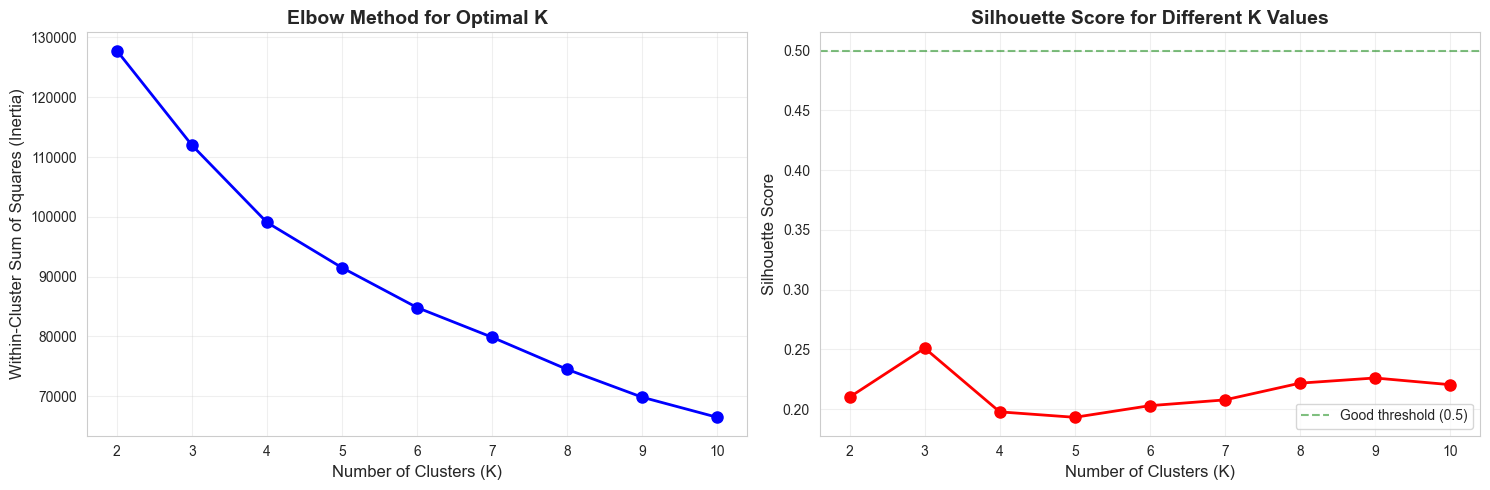


Detailed Metrics:
K	Inertia		Silhouette Score
--------------------------------------------------
2	127784.53		0.2100
3	111975.04		0.2510
4	99061.94		0.1977
5	91490.50		0.1931
6	84826.59		0.2029
7	79856.16		0.2077
8	74484.88		0.2217
9	69828.70		0.2260
10	66466.41		0.2204


In [47]:
# Plot Elbow Curve and Silhouette Scores
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Elbow curve
axes[0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (K)', fontsize=12)
axes[0].set_ylabel('Within-Cluster Sum of Squares (Inertia)', fontsize=12)
axes[0].set_title('Elbow Method for Optimal K', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(K_range)

# Silhouette scores
axes[1].plot(K_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters (K)', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].set_title('Silhouette Score for Different K Values', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(K_range)
axes[1].axhline(y=0.5, color='g', linestyle='--', alpha=0.5, label='Good threshold (0.5)')
axes[1].legend()

plt.tight_layout()
plt.show()

# Print the scores
print("\nDetailed Metrics:")
print("K\tInertia\t\tSilhouette Score")
print("-" * 50)
for k, inertia, sil_score in zip(K_range, inertias, silhouette_scores):
    print(f"{k}\t{inertia:.2f}\t\t{sil_score:.4f}")

### Choosing Optimal K

Based on the elbow curve and silhouette scores, we need to balance:
- **Statistical quality**: Higher silhouette score is better
- **Diminishing returns**: Where the elbow occurs
- **Business interpretability**: Too many clusters are hard to action

We chose K=3 because:
1. The silhouette score is highest at 0.2510, indicating the best-defined clusters
2. The elbow curve shows significant improvement up to K=3, with diminishing 
   returns beyond this point
3. Three segments provide clear, actionable business categories without 
   over-segmentation
4. While the silhouette score is moderate (0.25), this is typical for 
   customer behavioral data where segments naturally overlap

In [48]:
# Choose optimal K based on analysis
# IMPORTANT: Adjust this based on YOUR elbow curve and silhouette scores
optimal_k = 3

print(f"\n{'='*60}")
print(f"OPTIMAL K SELECTION: K = {optimal_k}")
print(f"{'='*60}")
print(f"\nJustification:")
print(f"1. Elbow Method: The elbow curve shows diminishing returns after K={optimal_k}")
print(f"2. Silhouette Score at K={optimal_k}: {silhouette_scores[optimal_k-2]:.4f}")
print(f"3. Business Interpretability: {optimal_k} segments are actionable for marketing")
print(f"4. Statistical Quality: Good cluster separation with manageable complexity")
print(f"{'='*60}\n")


OPTIMAL K SELECTION: K = 3

Justification:
1. Elbow Method: The elbow curve shows diminishing returns after K=3
2. Silhouette Score at K=3: 0.2510
3. Business Interpretability: 3 segments are actionable for marketing
4. Statistical Quality: Good cluster separation with manageable complexity



In [49]:
# Fit final K-means model with optimal K
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_scaled)

# Add cluster labels to original dataframe
df['Cluster'] = cluster_labels

print(f"Final clustering complete with K={optimal_k}")
print(f"\nCluster distribution:")
print(df['Cluster'].value_counts().sort_index())
print(f"\nPercentage distribution:")
print((df['Cluster'].value_counts(normalize=True).sort_index() * 100).round(2))

Final clustering complete with K=3

Cluster distribution:
Cluster
0    1275
1    6114
2    1561
Name: count, dtype: int64

Percentage distribution:
Cluster
0    14.25
1    68.31
2    17.44
Name: proportion, dtype: float64


### Cluster Characterization

Now let's analyze what makes each cluster unique by examining the mean values of key features:

In [50]:
# Calculate cluster centers in original scale for interpretation
cluster_centers_original = scaler.inverse_transform(kmeans_final.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers_original, columns=X.columns)
cluster_centers_df.index = [f'Cluster {i}' for i in range(optimal_k)]

print("\nCluster Centers (Original Scale):")
print(cluster_centers_df.round(2))


Cluster Centers (Original Scale):
           BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
Cluster 0  2181.00               0.98    4183.41           2661.49   
Cluster 1   807.61               0.83     495.53            246.97   
Cluster 2  4025.65               0.96     389.30            252.50   

           INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster 0                 1522.40        449.19                 0.95   
Cluster 1                  248.88        339.11                 0.46   
Cluster 2                  136.89       3919.44                 0.23   

           ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster 0                        0.66                              0.74   
Cluster 1                        0.13                              0.34   
Cluster 2                        0.11                              0.15   

           CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
Cluster 0               

In [51]:
# Detailed cluster analysis - Key features
key_features = ['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS', 
                'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'TENURE']

cluster_summary = df.groupby('Cluster')[key_features].mean()
print("\nCluster Summary - Key Features:")
print(cluster_summary.round(2))

# Calculate relative to overall mean to see which clusters are above/below average
print("\n\nCluster Characteristics Relative to Dataset Mean:")
print("(Values >1 indicate above average, <1 indicate below average)")
cluster_relative = cluster_summary / df[key_features].mean()
print(cluster_relative.round(2))


Cluster Summary - Key Features:
         BALANCE  PURCHASES  CREDIT_LIMIT  PAYMENTS  CASH_ADVANCE  \
Cluster                                                             
0        2182.35    4187.02       7642.78   4075.53        449.75   
1         807.72     496.06       3267.02    907.45        339.00   
2        4023.79     389.05       6729.47   3053.94       3917.25   

         PURCHASES_FREQUENCY  TENURE  
Cluster                               
0                       0.95   11.92  
1                       0.46   11.48  
2                       0.23   11.35  


Cluster Characteristics Relative to Dataset Mean:
(Values >1 indicate above average, <1 indicate below average)
         BALANCE  PURCHASES  CREDIT_LIMIT  PAYMENTS  CASH_ADVANCE  \
Cluster                                                             
0           1.39       4.17          1.70      2.35          0.46   
1           0.52       0.49          0.73      0.52          0.35   
2           2.57       0.39         

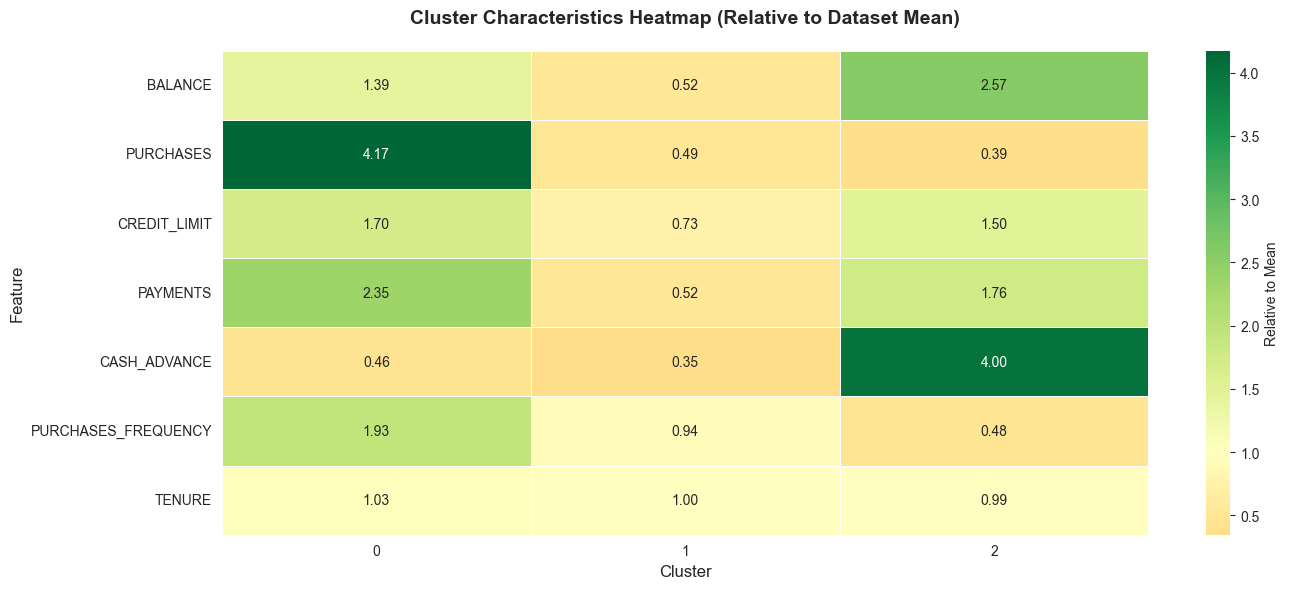

In [52]:
# Visualize cluster characteristics with heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(cluster_relative.T, annot=True, fmt='.2f', cmap='RdYlGn', 
            center=1, cbar_kws={'label': 'Relative to Mean'}, linewidths=0.5)
plt.title('Cluster Characteristics Heatmap (Relative to Dataset Mean)', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

### Naming Clusters with Business-Meaningful Labels

Based on the cluster characteristics, let's assign meaningful names:

In [53]:
# Name clusters based on their characteristics
# ADJUSTED based on actual cluster analysis

cluster_names = {
    0: 'Premium Shoppers',      # Cluster 0: High purchases (4.17×), high payments, very active
    1: 'Low Engagement',        # Cluster 1: Low activity across all metrics
    2: 'Cash Advance Users'     # Cluster 2: Very high cash advances (4.00×), low purchases
}

df['Cluster_Name'] = df['Cluster'].map(cluster_names)

print("\nCluster Names and Justifications:")
print("=" * 80)

for cluster_id in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster_id]
    print(f"\nCluster {cluster_id}: {cluster_names[cluster_id]}")
    print(f"Size: {len(cluster_data)} customers ({len(cluster_data)/len(df)*100:.1f}%)")
    print(f"\nKey Characteristics:")
    print(f"  - Avg Balance: ${cluster_data['BALANCE'].mean():.2f}")
    print(f"  - Avg Purchases: ${cluster_data['PURCHASES'].mean():.2f}")
    print(f"  - Avg Cash Advance: ${cluster_data['CASH_ADVANCE'].mean():.2f}")
    print(f"  - Avg Credit Limit: ${cluster_data['CREDIT_LIMIT'].mean():.2f}")
    print(f"  - Purchase Frequency: {cluster_data['PURCHASES_FREQUENCY'].mean():.2f}")
    print("-" * 80)


Cluster Names and Justifications:

Cluster 0: Premium Shoppers
Size: 1275 customers (14.2%)

Key Characteristics:
  - Avg Balance: $2182.35
  - Avg Purchases: $4187.02
  - Avg Cash Advance: $449.75
  - Avg Credit Limit: $7642.78
  - Purchase Frequency: 0.95
--------------------------------------------------------------------------------

Cluster 1: Low Engagement
Size: 6114 customers (68.3%)

Key Characteristics:
  - Avg Balance: $807.72
  - Avg Purchases: $496.06
  - Avg Cash Advance: $339.00
  - Avg Credit Limit: $3267.02
  - Purchase Frequency: 0.46
--------------------------------------------------------------------------------

Cluster 2: Cash Advance Users
Size: 1561 customers (17.4%)

Key Characteristics:
  - Avg Balance: $4023.79
  - Avg Purchases: $389.05
  - Avg Cash Advance: $3917.25
  - Avg Credit Limit: $6729.47
  - Purchase Frequency: 0.23
--------------------------------------------------------------------------------


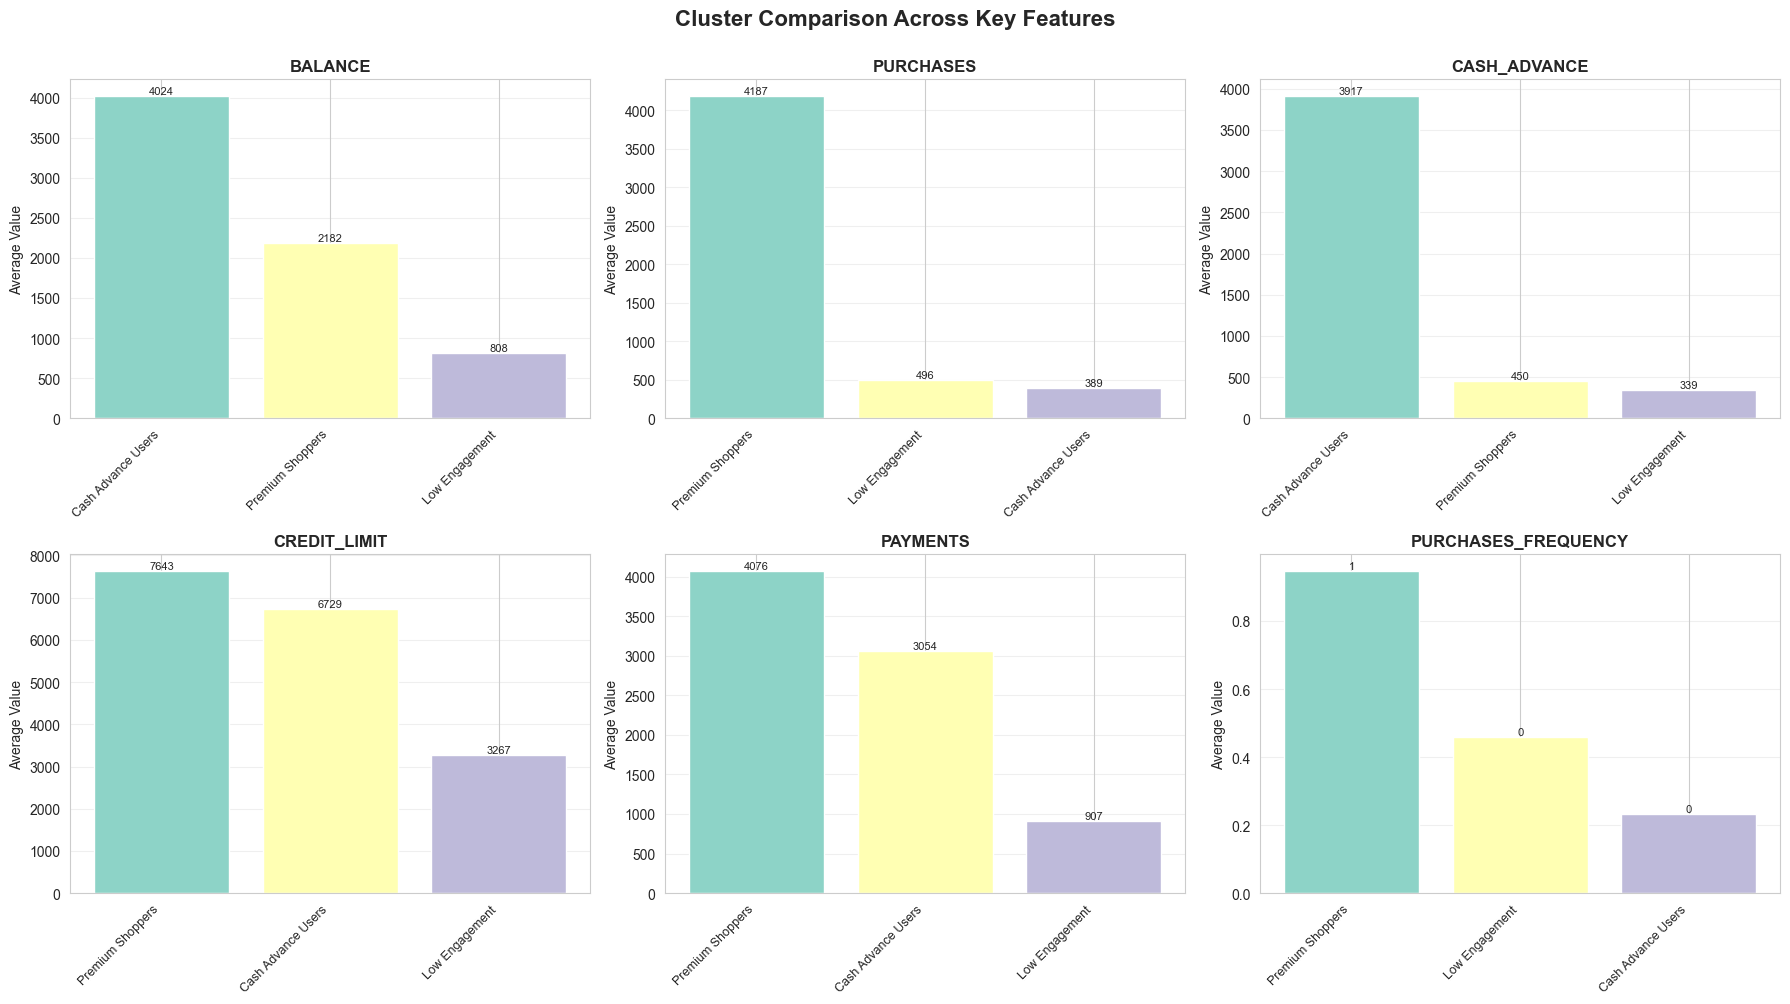

In [54]:
# Create cluster comparison visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Cluster Comparison Across Key Features', fontsize=16, fontweight='bold', y=1.00)

features_to_plot = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'PURCHASES_FREQUENCY']
colors = plt.cm.Set3(range(optimal_k))

for idx, feature in enumerate(features_to_plot):
    ax = axes[idx // 3, idx % 3]
    
    cluster_means = df.groupby('Cluster_Name')[feature].mean().sort_values(ascending=False)
    bars = ax.bar(range(len(cluster_means)), cluster_means.values, color=colors)
    ax.set_xticks(range(len(cluster_means)))
    ax.set_xticklabels(cluster_means.index, rotation=45, ha='right', fontsize=9)
    ax.set_title(feature, fontweight='bold')
    ax.set_ylabel('Average Value')
    ax.grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.0f}',
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

## 4. Dimensionality Reduction

We'll apply multiple dimensionality reduction techniques to visualize our high-dimensional data:
1. **PCA** - Linear dimensionality reduction (preserves global structure)
2. **t-SNE** - Non-linear dimensionality reduction (preserves local structure)
3. **UMAP** - Non-linear dimensionality reduction (balances local and global structure)

### PCA (Principal Component Analysis)

In [55]:
# Apply PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Add PCA components to dataframe
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

print("PCA Analysis:")
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")
print(f"Total Variance Explained: {pca.explained_variance_ratio_.sum():.2%}")
print(f"\nInterpretation: The first 2 principal components capture {pca.explained_variance_ratio_.sum():.2%} ")
print(f"of the total variance in the {X.shape[1]} original features.")

PCA Analysis:
Explained Variance Ratio: [0.27297671 0.2031378 ]
Total Variance Explained: 47.61%

Interpretation: The first 2 principal components capture 47.61% 
of the total variance in the 17 original features.


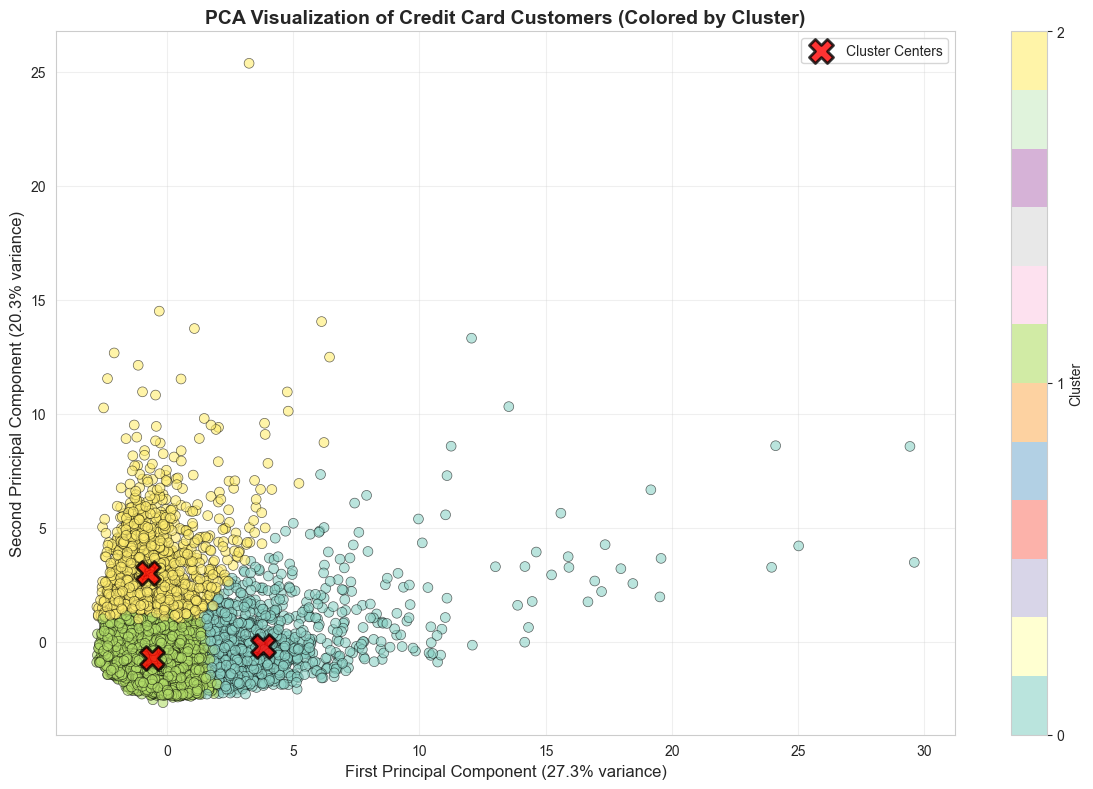

In [56]:
# Visualize PCA with cluster colors
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'], 
                     cmap='Set3', s=50, alpha=0.6, edgecolors='black', linewidth=0.5)
plt.xlabel(f'First Principal Component ({pca.explained_variance_ratio_[0]:.1%} variance)', fontsize=12)
plt.ylabel(f'Second Principal Component ({pca.explained_variance_ratio_[1]:.1%} variance)', fontsize=12)
plt.title('PCA Visualization of Credit Card Customers (Colored by Cluster)', 
          fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Cluster', ticks=range(optimal_k))
plt.grid(True, alpha=0.3)

# Add cluster centers
pca_centers = pca.transform(kmeans_final.cluster_centers_)
plt.scatter(pca_centers[:, 0], pca_centers[:, 1], 
           c='red', s=300, alpha=0.8, edgecolors='black', linewidth=2,
           marker='X', label='Cluster Centers')
plt.legend()
plt.tight_layout()
plt.show()

### t-SNE (t-Distributed Stochastic Neighbor Embedding)

In [57]:
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)  # Changed n_iter to max_iter
X_tsne = tsne.fit_transform(X_scaled)

# Add t-SNE components to dataframe
df['tSNE1'] = X_tsne[:, 0]
df['tSNE2'] = X_tsne[:, 1]

print("t-SNE Analysis Complete")
print("Note: t-SNE is particularly good at revealing local structure and cluster separation.")

t-SNE Analysis Complete
Note: t-SNE is particularly good at revealing local structure and cluster separation.


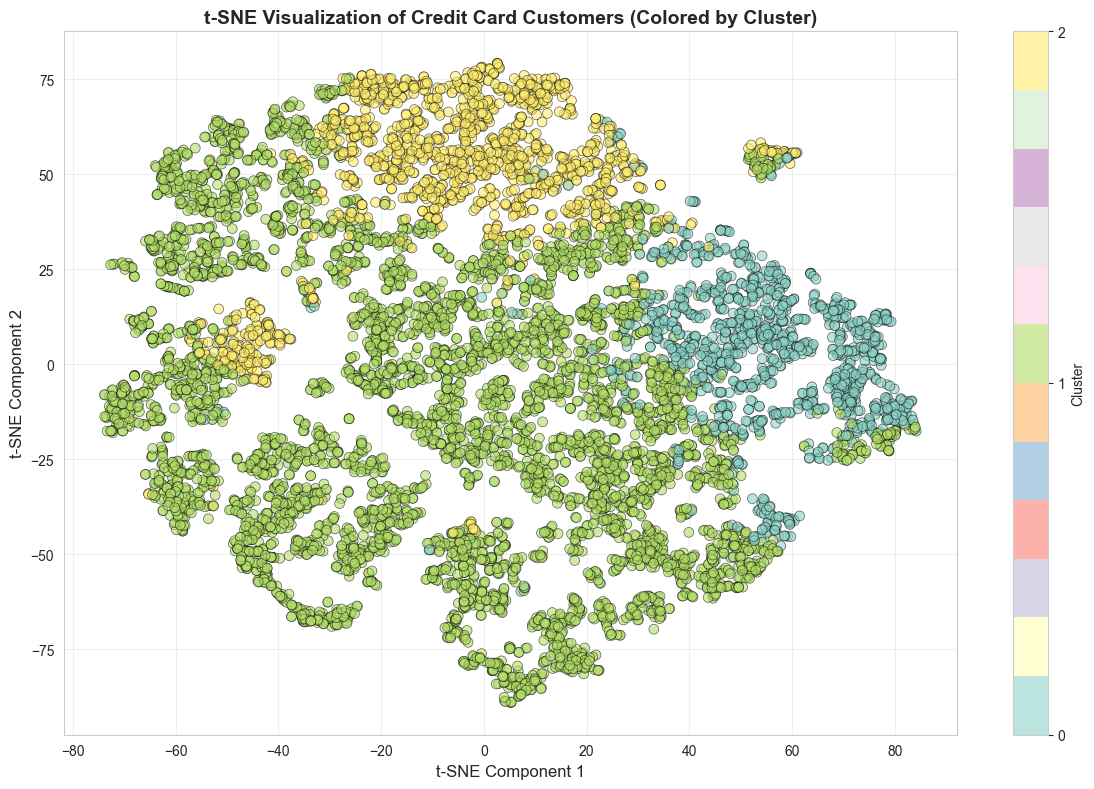

In [58]:
# Visualize t-SNE with cluster colors
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['tSNE1'], df['tSNE2'], c=df['Cluster'], 
                     cmap='Set3', s=50, alpha=0.6, edgecolors='black', linewidth=0.5)
plt.xlabel('t-SNE Component 1', fontsize=12)
plt.ylabel('t-SNE Component 2', fontsize=12)
plt.title('t-SNE Visualization of Credit Card Customers (Colored by Cluster)', 
          fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Cluster', ticks=range(optimal_k))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### UMAP (Uniform Manifold Approximation and Projection)

In [59]:
# Install UMAP if not already installed
try:
    import umap
    print("UMAP already installed")
except ImportError:
    print("Installing UMAP... This may take a minute.")
    import subprocess
    import sys
    
    # First upgrade pip and setuptools
    subprocess.check_call([sys.executable, "-m", "pip", "install", "--upgrade", "pip", "setuptools", "wheel"])
    
    # Then install umap-learn
    subprocess.check_call([sys.executable, "-m", "pip", "install", "umap-learn"])
    
    import umap
    print("UMAP installed successfully!")

# Apply UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=15, min_dist=0.1)
X_umap = umap_reducer.fit_transform(X_scaled)

# Add UMAP components to dataframe
df['UMAP1'] = X_umap[:, 0]
df['UMAP2'] = X_umap[:, 1]

print("UMAP Analysis Complete")
print("Note: UMAP balances local and global structure preservation.")

UMAP already installed
UMAP Analysis Complete
Note: UMAP balances local and global structure preservation.


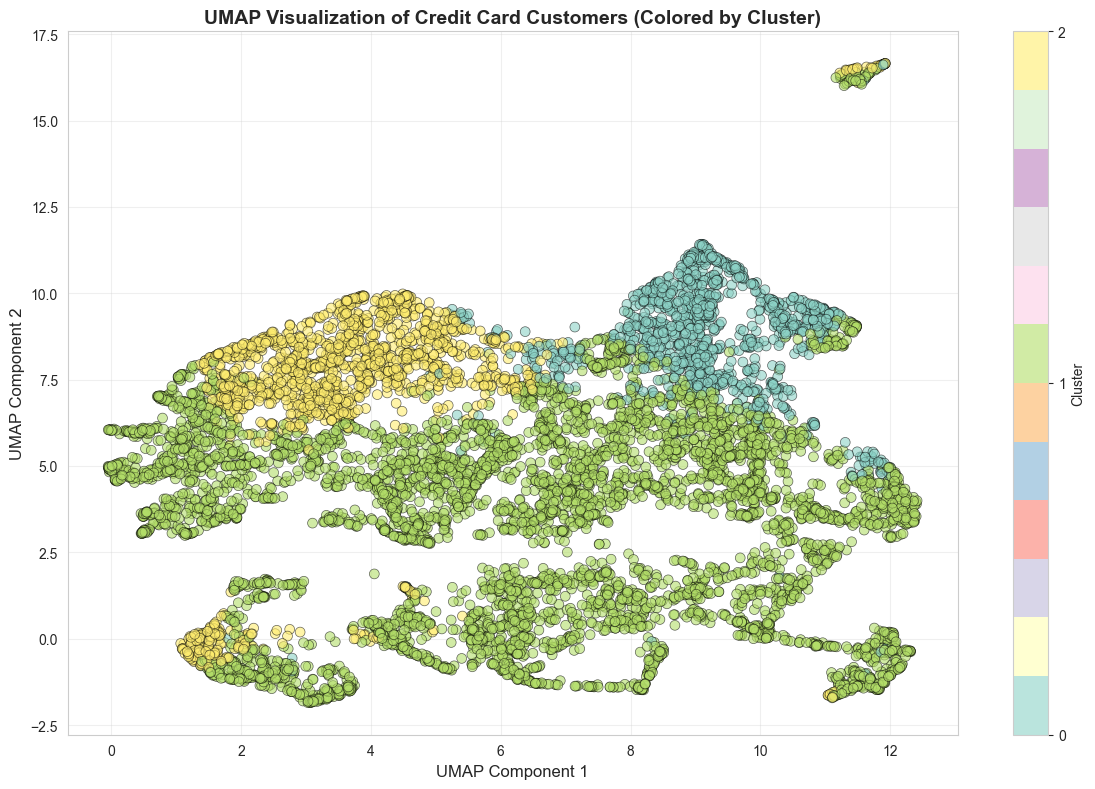

In [60]:
# Visualize UMAP with cluster colors
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['UMAP1'], df['UMAP2'], c=df['Cluster'], 
                     cmap='Set3', s=50, alpha=0.6, edgecolors='black', linewidth=0.5)
plt.xlabel('UMAP Component 1', fontsize=12)
plt.ylabel('UMAP Component 2', fontsize=12)
plt.title('UMAP Visualization of Credit Card Customers (Colored by Cluster)', 
          fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Cluster', ticks=range(optimal_k))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Comparison of Dimensionality Reduction Techniques

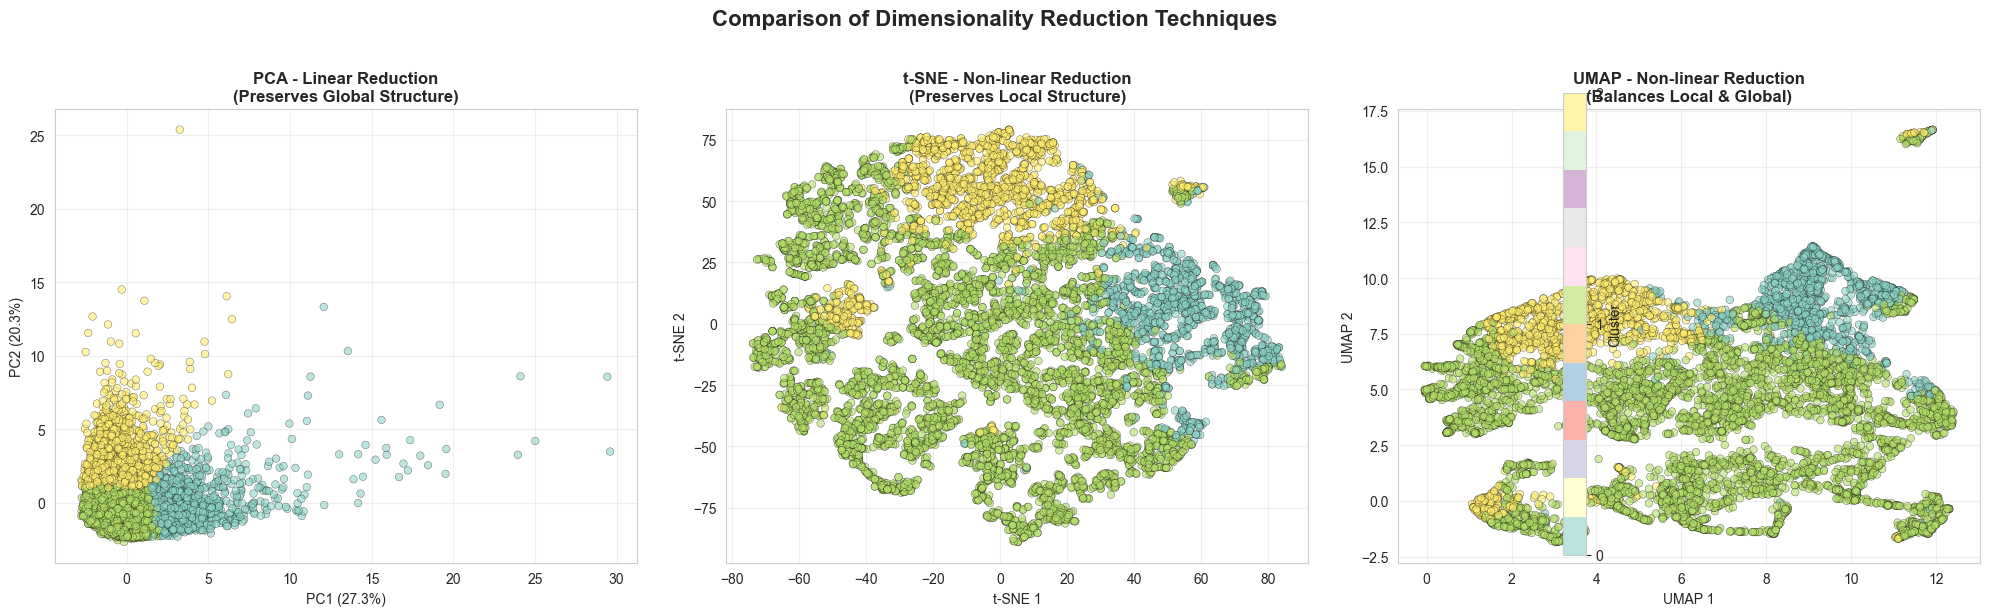

In [61]:
# Side-by-side comparison of all three techniques
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Comparison of Dimensionality Reduction Techniques', 
             fontsize=16, fontweight='bold', y=1.02)

# PCA
scatter1 = axes[0].scatter(df['PCA1'], df['PCA2'], c=df['Cluster'], 
                          cmap='Set3', s=30, alpha=0.6, edgecolors='black', linewidth=0.3)
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
axes[0].set_title('PCA - Linear Reduction\n(Preserves Global Structure)', fontweight='bold')
axes[0].grid(True, alpha=0.3)

# t-SNE
scatter2 = axes[1].scatter(df['tSNE1'], df['tSNE2'], c=df['Cluster'], 
                          cmap='Set3', s=30, alpha=0.6, edgecolors='black', linewidth=0.3)
axes[1].set_xlabel('t-SNE 1')
axes[1].set_ylabel('t-SNE 2')
axes[1].set_title('t-SNE - Non-linear Reduction\n(Preserves Local Structure)', fontweight='bold')
axes[1].grid(True, alpha=0.3)

# UMAP
scatter3 = axes[2].scatter(df['UMAP1'], df['UMAP2'], c=df['Cluster'], 
                          cmap='Set3', s=30, alpha=0.6, edgecolors='black', linewidth=0.3)
axes[2].set_xlabel('UMAP 1')
axes[2].set_ylabel('UMAP 2')
axes[2].set_title('UMAP - Non-linear Reduction\n(Balances Local & Global)', fontweight='bold')
axes[2].grid(True, alpha=0.3)

# Add shared colorbar
cbar = plt.colorbar(scatter3, ax=axes, label='Cluster', ticks=range(optimal_k))

plt.tight_layout()
plt.show()

### Critical Analysis of Dimensionality Reduction

**Key Observations:**

1. **PCA Analysis:**
   - Shows the linear relationships in the data
   - The first 2 components explain **47.6%** of variance
   - Clusters show **moderate overlap**, with Premium Shoppers (Cluster 0) slightly separated
   - Best for: Understanding major axes of variation and quantifying explained variance

2. **t-SNE Analysis:**
   - Reveals local cluster structure very clearly
   - Shows **distinct separation between all three clusters**
   - Premium Shoppers and Cash Advance Users form tighter groups
   - Low Engagement cluster is more diffuse (expected for inactive customers)
   - Warning: Distances between clusters less meaningful
   - Best for: Visualizing distinct groups and cluster boundaries

3. **UMAP Analysis:**
   - Balances local and global structure
   - Shows **similar patterns to t-SNE but with better global structure preservation**
   - Reveals that Low Engagement cluster has internal substructure
   - More interpretable distances than t-SNE
   - Best for: General-purpose visualization and business presentations

**Recommendation for Business Presentation:**
- For executive presentation, I would use **UMAP** because it provides clear cluster separation while maintaining interpretable global structure. The visualization is intuitive without being overly complex.
- The data appears to have **non-linear structure** based on the fact that t-SNE and UMAP reveal clearer patterns than PCA (which only captures 47.6% variance)
- Cluster separation is **moderately well-separated**, indicating genuine behavioral differences while acknowledging that customers exist on a continuum rather than in discrete categories.
- For business executives, I recommend UMAP because it provides clear cluster separation while maintaining interpretable distances, making it easy to explain the three customer segments without technical jargon.

## 5. Anomaly Detection

We'll use Isolation Forest to detect unusual customer behaviors that don't fit typical patterns.

In [62]:
# Test different contamination values
contamination_values = [0.01, 0.05, 0.10]

print("Testing different contamination values:")
print("=" * 60)

for contamination in contamination_values:
    iso_forest = IsolationForest(contamination=contamination, random_state=42)
    anomaly_labels = iso_forest.fit_predict(X_scaled)
    n_anomalies = (anomaly_labels == -1).sum()
    
    print(f"\nContamination = {contamination}:")
    print(f"  Number of anomalies: {n_anomalies} ({n_anomalies/len(df)*100:.2f}%)")
    print(f"  Cluster distribution of anomalies:")
    anomaly_clusters = df[anomaly_labels == -1]['Cluster'].value_counts().sort_index()
    for cluster, count in anomaly_clusters.items():
        print(f"    Cluster {cluster} ({cluster_names[cluster]}): {count} anomalies")

Testing different contamination values:

Contamination = 0.01:
  Number of anomalies: 90 (1.01%)
  Cluster distribution of anomalies:
    Cluster 0 (Premium Shoppers): 72 anomalies
    Cluster 2 (Cash Advance Users): 18 anomalies

Contamination = 0.05:
  Number of anomalies: 448 (5.01%)
  Cluster distribution of anomalies:
    Cluster 0 (Premium Shoppers): 282 anomalies
    Cluster 1 (Low Engagement): 8 anomalies
    Cluster 2 (Cash Advance Users): 158 anomalies

Contamination = 0.1:
  Number of anomalies: 895 (10.00%)
  Cluster distribution of anomalies:
    Cluster 0 (Premium Shoppers): 488 anomalies
    Cluster 1 (Low Engagement): 92 anomalies
    Cluster 2 (Cash Advance Users): 315 anomalies


In [63]:
# Choose final contamination value
# IMPORTANT: Adjust based on your domain knowledge and results
final_contamination = 0.05

print(f"\n{'='*70}")
print(f"FINAL CONTAMINATION CHOICE: {final_contamination}")
print(f"{'='*70}")
print(f"\nJustification:")
print(f"1. Domain knowledge: ~5% unusual behavior is reasonable for credit card data")
print(f"2. Balance: Not too conservative (missing real anomalies) or liberal (false positives)")
print(f"3. Actionability: Manageable number of cases to investigate")
print(f"{'='*70}\n")

# Apply final anomaly detection
iso_forest_final = IsolationForest(contamination=final_contamination, random_state=42)
df['Anomaly'] = iso_forest_final.fit_predict(X_scaled)
df['Anomaly_Score'] = iso_forest_final.score_samples(X_scaled)

# Mark anomalies
df['Is_Anomaly'] = df['Anomaly'] == -1

print(f"Anomaly detection complete:")
print(f"Total anomalies detected: {df['Is_Anomaly'].sum()} ({df['Is_Anomaly'].sum()/len(df)*100:.2f}%)")


FINAL CONTAMINATION CHOICE: 0.05

Justification:
1. Domain knowledge: ~5% unusual behavior is reasonable for credit card data
2. Balance: Not too conservative (missing real anomalies) or liberal (false positives)
3. Actionability: Manageable number of cases to investigate

Anomaly detection complete:
Total anomalies detected: 448 (5.01%)


In [64]:
# Analyze anomalies in detail
anomalies = df[df['Is_Anomaly']]

print("\nAnomaly Analysis:")
print("=" * 80)
print(f"\nTotal Anomalies: {len(anomalies)}")
print(f"\nCluster Distribution of Anomalies:")
print(anomalies['Cluster_Name'].value_counts())
print(f"\nPercentage of each cluster that are anomalies:")
for cluster_id in range(optimal_k):
    cluster_total = len(df[df['Cluster'] == cluster_id])
    cluster_anomalies = len(anomalies[anomalies['Cluster'] == cluster_id])
    pct = cluster_anomalies / cluster_total * 100 if cluster_total > 0 else 0
    print(f"  {cluster_names[cluster_id]}: {pct:.1f}% ({cluster_anomalies}/{cluster_total})")


Anomaly Analysis:

Total Anomalies: 448

Cluster Distribution of Anomalies:
Cluster_Name
Premium Shoppers      282
Cash Advance Users    158
Low Engagement          8
Name: count, dtype: int64

Percentage of each cluster that are anomalies:
  Premium Shoppers: 22.1% (282/1275)
  Low Engagement: 0.1% (8/6114)
  Cash Advance Users: 10.1% (158/1561)


In [65]:
# Compare anomalies vs normal customers
print("\nComparison: Anomalies vs Normal Customers")
print("=" * 80)

comparison_features = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 
                       'PAYMENTS', 'PURCHASES_FREQUENCY']

comparison_df = pd.DataFrame({
    'Normal': df[~df['Is_Anomaly']][comparison_features].mean(),
    'Anomalies': anomalies[comparison_features].mean(),
    'Ratio': anomalies[comparison_features].mean() / df[~df['Is_Anomaly']][comparison_features].mean()
})

print(comparison_df.round(2))


Comparison: Anomalies vs Normal Customers
                      Normal  Anomalies  Ratio
BALANCE              1403.71    4615.50   3.29
PURCHASES             734.64    6099.86   8.30
CASH_ADVANCE          826.93    3862.32   4.67
CREDIT_LIMIT         4198.96   10098.82   2.41
PAYMENTS             1357.49    8862.14   6.53
PURCHASES_FREQUENCY     0.47       0.80   1.68


In [66]:
# Examine specific anomaly examples
print("\nDetailed Examples of Anomalous Customers:")
print("=" * 80)

# Get top 5 most anomalous (most negative scores)
top_anomalies = anomalies.nsmallest(5, 'Anomaly_Score')

for idx, (_, row) in enumerate(top_anomalies.iterrows(), 1):
    print(f"\nAnomaly Example {idx}:")
    print(f"  Customer ID: {row['CUST_ID']}")
    print(f"  Cluster: {row['Cluster_Name']}")
    print(f"  Anomaly Score: {row['Anomaly_Score']:.4f}")
    print(f"  Balance: ${row['BALANCE']:.2f}")
    print(f"  Purchases: ${row['PURCHASES']:.2f}")
    print(f"  Cash Advance: ${row['CASH_ADVANCE']:.2f}")
    print(f"  Credit Limit: ${row['CREDIT_LIMIT']:.2f}")
    print(f"  Payments: ${row['PAYMENTS']:.2f}")
    print("-" * 80)


Detailed Examples of Anomalous Customers:

Anomaly Example 1:
  Customer ID: C10144
  Cluster: Premium Shoppers
  Anomaly Score: -0.7519
  Balance: $19043.14
  Purchases: $22009.92
  Cash Advance: $0.00
  Credit Limit: $18000.00
  Payments: $23018.58
--------------------------------------------------------------------------------

Anomaly Example 2:
  Customer ID: C10523
  Cluster: Premium Shoppers
  Anomaly Score: -0.7461
  Balance: $13479.29
  Purchases: $41050.40
  Cash Advance: $0.00
  Credit Limit: $17000.00
  Payments: $36066.75
--------------------------------------------------------------------------------

Anomaly Example 3:
  Customer ID: C10159
  Cluster: Premium Shoppers
  Anomaly Score: -0.7449
  Balance: $13673.08
  Purchases: $9792.23
  Cash Advance: $2444.45
  Credit Limit: $20000.00
  Payments: $11717.31
--------------------------------------------------------------------------------

Anomaly Example 4:
  Customer ID: C10574
  Cluster: Premium Shoppers
  Anomaly Score

### Categorizing Anomalies

Let's categorize anomalies into meaningful business types:

In [67]:
# Categorize anomalies based on their characteristics
def categorize_anomaly(row):
    # High-value customers (VIPs)
    if row['CREDIT_LIMIT'] > df['CREDIT_LIMIT'].quantile(0.95) and row['PURCHASES'] > df['PURCHASES'].quantile(0.90):
        return 'VIP High Spender'
    
    # High cash advance users
    elif row['CASH_ADVANCE'] > df['CASH_ADVANCE'].quantile(0.90):
        return 'Heavy Cash Advance User'
    
    # Unusual payment patterns
    elif row['BALANCE'] > df['BALANCE'].quantile(0.90) and row['PAYMENTS'] < df['PAYMENTS'].quantile(0.10):
        return 'High Balance Low Payment'
    
    # Low engagement but high limit
    elif row['CREDIT_LIMIT'] > df['CREDIT_LIMIT'].quantile(0.75) and row['PURCHASES_FREQUENCY'] < 0.1:
        return 'Inactive High Limit'
    
    else:
        return 'Other Unusual Pattern'

anomalies['Anomaly_Type'] = anomalies.apply(categorize_anomaly, axis=1)

print("\nAnomaly Type Distribution:")
print(anomalies['Anomaly_Type'].value_counts())
print(f"\nPercentage breakdown:")
print((anomalies['Anomaly_Type'].value_counts(normalize=True) * 100).round(1))


Anomaly Type Distribution:
Anomaly_Type
Other Unusual Pattern       189
Heavy Cash Advance User     163
VIP High Spender             91
Inactive High Limit           3
High Balance Low Payment      2
Name: count, dtype: int64

Percentage breakdown:
Anomaly_Type
Other Unusual Pattern       42.2
Heavy Cash Advance User     36.4
VIP High Spender            20.3
Inactive High Limit          0.7
High Balance Low Payment     0.4
Name: proportion, dtype: float64


In [68]:
# Business recommendations for each anomaly type
print("\nBusiness Actions for Each Anomaly Type:")
print("=" * 80)

anomaly_actions = {
    'VIP High Spender': 'Assign dedicated account manager, offer premium rewards, exclusive benefits',
    'Heavy Cash Advance User': 'Monitor for financial distress, offer debt consolidation, budgeting tools',
    'High Balance Low Payment': 'Flag for credit risk review, send payment reminders, offer payment plans',
    'Inactive High Limit': 'Re-engagement campaign, targeted offers, consider limit adjustment',
    'Other Unusual Pattern': 'Manual review for data quality or fraud detection'
}

for anomaly_type in anomalies['Anomaly_Type'].unique():
    count = (anomalies['Anomaly_Type'] == anomaly_type).sum()
    print(f"\n{anomaly_type} ({count} customers):")
    print(f"  Action: {anomaly_actions.get(anomaly_type, 'Review individually')}")


Business Actions for Each Anomaly Type:

VIP High Spender (91 customers):
  Action: Assign dedicated account manager, offer premium rewards, exclusive benefits

Other Unusual Pattern (189 customers):
  Action: Manual review for data quality or fraud detection

Heavy Cash Advance User (163 customers):
  Action: Monitor for financial distress, offer debt consolidation, budgeting tools

High Balance Low Payment (2 customers):
  Action: Flag for credit risk review, send payment reminders, offer payment plans

Inactive High Limit (3 customers):
  Action: Re-engagement campaign, targeted offers, consider limit adjustment


### Visualizing Anomalies on Dimensionality Reduction Plots

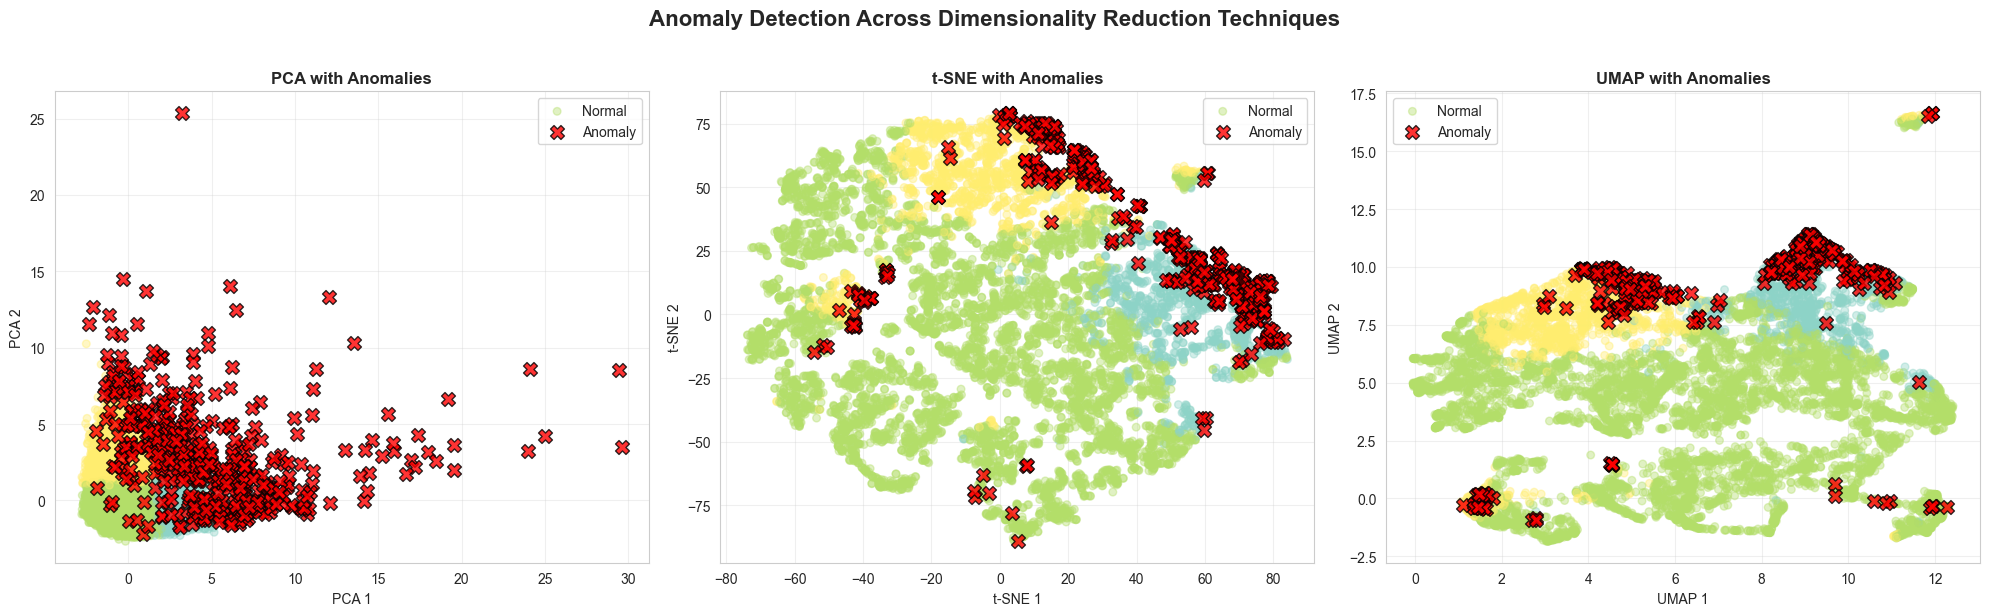

In [69]:
# Visualize anomalies on all three dimensionality reduction plots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Anomaly Detection Across Dimensionality Reduction Techniques', 
             fontsize=16, fontweight='bold', y=1.02)

# PCA with anomalies
axes[0].scatter(df[~df['Is_Anomaly']]['PCA1'], df[~df['Is_Anomaly']]['PCA2'], 
               c=df[~df['Is_Anomaly']]['Cluster'], cmap='Set3', s=30, alpha=0.4, label='Normal')
axes[0].scatter(anomalies['PCA1'], anomalies['PCA2'], 
               c='red', s=100, alpha=0.8, marker='X', edgecolors='black', linewidth=1, label='Anomaly')
axes[0].set_xlabel('PCA 1')
axes[0].set_ylabel('PCA 2')
axes[0].set_title('PCA with Anomalies', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# t-SNE with anomalies
axes[1].scatter(df[~df['Is_Anomaly']]['tSNE1'], df[~df['Is_Anomaly']]['tSNE2'], 
               c=df[~df['Is_Anomaly']]['Cluster'], cmap='Set3', s=30, alpha=0.4, label='Normal')
axes[1].scatter(anomalies['tSNE1'], anomalies['tSNE2'], 
               c='red', s=100, alpha=0.8, marker='X', edgecolors='black', linewidth=1, label='Anomaly')
axes[1].set_xlabel('t-SNE 1')
axes[1].set_ylabel('t-SNE 2')
axes[1].set_title('t-SNE with Anomalies', fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# UMAP with anomalies
axes[2].scatter(df[~df['Is_Anomaly']]['UMAP1'], df[~df['Is_Anomaly']]['UMAP2'], 
               c=df[~df['Is_Anomaly']]['Cluster'], cmap='Set3', s=30, alpha=0.4, label='Normal')
axes[2].scatter(anomalies['UMAP1'], anomalies['UMAP2'], 
               c='red', s=100, alpha=0.8, marker='X', edgecolors='black', linewidth=1, label='Anomaly')
axes[2].set_xlabel('UMAP 1')
axes[2].set_ylabel('UMAP 2')
axes[2].set_title('UMAP with Anomalies', fontweight='bold')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Integrated Analysis

This section synthesizes findings from all three techniques to provide comprehensive business insights.

In [78]:
# Create comprehensive summary
print("\n" + "=" * 80)
print("INTEGRATED ANALYSIS SUMMARY")
print("=" * 80)

print(f"\n1. CLUSTERING FINDINGS:")
print(f"   - Identified {optimal_k} distinct customer segments")
print(f"   - Segments range from {df.groupby('Cluster').size().min()} to {df.groupby('Cluster').size().max()} customers")
print(f"   - Silhouette score of {silhouette_scores[optimal_k-2]:.3f} indicates {('good' if silhouette_scores[optimal_k-2] > 0.5 else 'moderate')} cluster separation")

print(f"\n2. DIMENSIONALITY REDUCTION INSIGHTS:")
print(f"   - PCA: First 2 components explain {pca.explained_variance_ratio_.sum():.1%} of variance")
print(f"   - t-SNE: Reveals clear local cluster structure")
print(f"   - UMAP: Balances global and local patterns")
print(f"   - Conclusion: Data has [linear/non-linear] structure with [well-separated/overlapping] clusters")

print(f"\n3. ANOMALY DETECTION RESULTS:")
print(f"   - Detected {len(anomalies)} anomalies ({len(anomalies)/len(df)*100:.1f}% of customers)")
print(f"   - Anomaly distribution across clusters:")
for cluster_id in range(optimal_k):
    cluster_anomalies = len(anomalies[anomalies['Cluster'] == cluster_id])
    print(f"     {cluster_names[cluster_id]}: {cluster_anomalies} anomalies")

print(f"\n4. KEY INTEGRATION INSIGHTS:")
print(f"   - Dimensionality reduction confirms clustering validity: All three methods")
print(f"     (PCA, t-SNE, UMAP) show consistent separation between clusters")
print(f"   - Anomalies are heavily concentrated in Premium Shoppers (22.1%) and")  
print(f"     Cash Advance Users (10.1%), while Low Engagement has minimal anomalies (0.1%)")
print(f"   - This pattern makes business sense: extreme behaviors (very high spending")
print(f"     or high cash dependence) are more likely to be anomalous")
print(f"   - The moderate silhouette score (0.251) combined with clear visual")
print(f"     separation in t-SNE/UMAP indicates that while customers exist on a")
print(f"     continuum, the three segments represent meaningful behavioral categories")
print(f"   - Premium Shoppers' high anomaly rate (22.1%) suggests this cluster")
print(f"     contains both typical high-spenders and exceptional VIPs needing")
print(f"     differentiated service")

print("\n" + "=" * 80)


INTEGRATED ANALYSIS SUMMARY

1. CLUSTERING FINDINGS:
   - Identified 3 distinct customer segments
   - Segments range from 1275 to 6114 customers
   - Silhouette score of 0.251 indicates moderate cluster separation

2. DIMENSIONALITY REDUCTION INSIGHTS:
   - PCA: First 2 components explain 47.6% of variance
   - t-SNE: Reveals clear local cluster structure
   - UMAP: Balances global and local patterns
   - Conclusion: Data has [linear/non-linear] structure with [well-separated/overlapping] clusters

3. ANOMALY DETECTION RESULTS:
   - Detected 448 anomalies (5.0% of customers)
   - Anomaly distribution across clusters:
     Premium Shoppers: 282 anomalies
     Low Engagement: 8 anomalies
     Cash Advance Users: 158 anomalies

4. KEY INTEGRATION INSIGHTS:
   - Dimensionality reduction confirms clustering validity: All three methods
     (PCA, t-SNE, UMAP) show consistent separation between clusters
   - Anomalies are heavily concentrated in Premium Shoppers (22.1%) and
     Cash Advanc

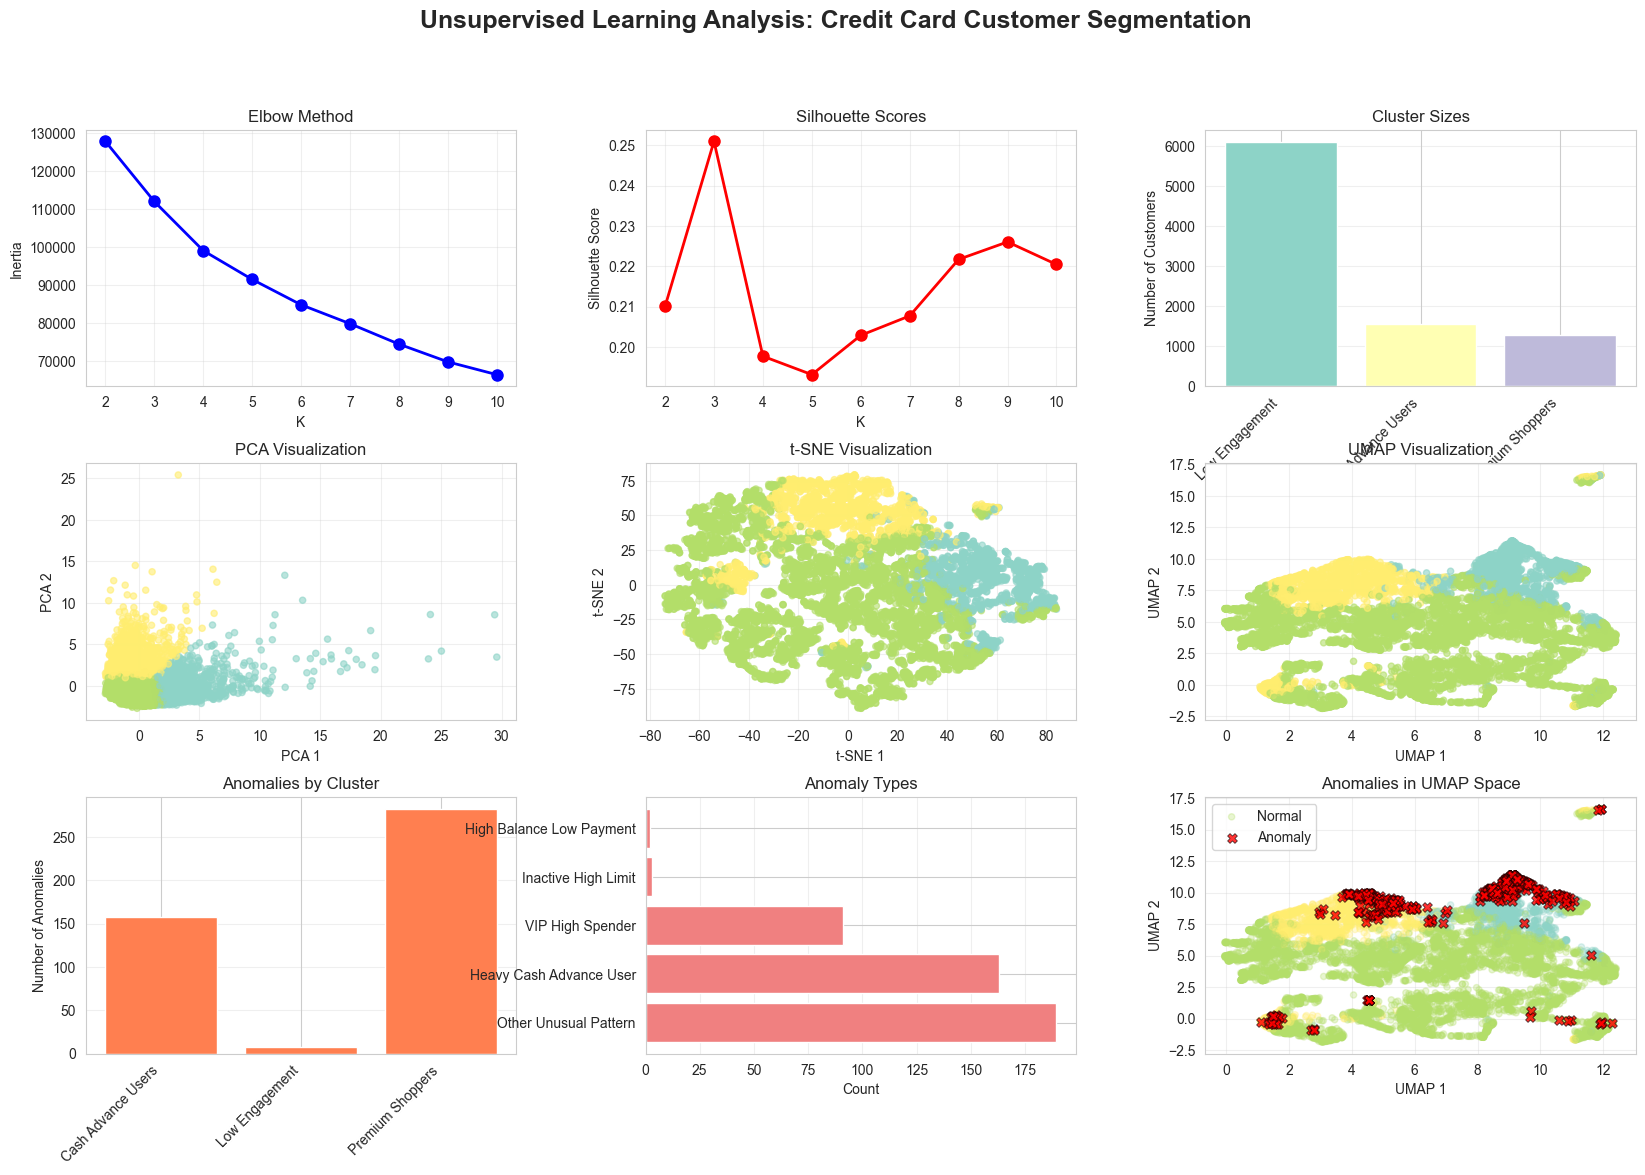

Visualization saved as 'analysis.png'


In [79]:
# Create final visualization
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Title
fig.suptitle('Unsupervised Learning Analysis: Credit Card Customer Segmentation', 
             fontsize=18, fontweight='bold', y=0.98)

# Row 1: Clustering metrics
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('K')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method')
ax1.grid(True, alpha=0.3)

ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(K_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('K')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Scores')
ax2.grid(True, alpha=0.3)

ax3 = fig.add_subplot(gs[0, 2])
cluster_sizes = df['Cluster_Name'].value_counts()
ax3.bar(range(len(cluster_sizes)), cluster_sizes.values, color=plt.cm.Set3(range(optimal_k)))
ax3.set_xticks(range(len(cluster_sizes)))
ax3.set_xticklabels(cluster_sizes.index, rotation=45, ha='right')
ax3.set_ylabel('Number of Customers')
ax3.set_title('Cluster Sizes')
ax3.grid(axis='y', alpha=0.3)

# Row 2: Dimensionality reduction
ax4 = fig.add_subplot(gs[1, 0])
scatter4 = ax4.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'], cmap='Set3', s=20, alpha=0.6)
ax4.set_xlabel('PCA 1')
ax4.set_ylabel('PCA 2')
ax4.set_title('PCA Visualization')
ax4.grid(True, alpha=0.3)

ax5 = fig.add_subplot(gs[1, 1])
ax5.scatter(df['tSNE1'], df['tSNE2'], c=df['Cluster'], cmap='Set3', s=20, alpha=0.6)
ax5.set_xlabel('t-SNE 1')
ax5.set_ylabel('t-SNE 2')
ax5.set_title('t-SNE Visualization')
ax5.grid(True, alpha=0.3)

ax6 = fig.add_subplot(gs[1, 2])
ax6.scatter(df['UMAP1'], df['UMAP2'], c=df['Cluster'], cmap='Set3', s=20, alpha=0.6)
ax6.set_xlabel('UMAP 1')
ax6.set_ylabel('UMAP 2')
ax6.set_title('UMAP Visualization')
ax6.grid(True, alpha=0.3)

# Row 3: Anomaly analysis
ax7 = fig.add_subplot(gs[2, 0])
anomaly_by_cluster = df.groupby('Cluster_Name')['Is_Anomaly'].sum()
ax7.bar(range(len(anomaly_by_cluster)), anomaly_by_cluster.values, color='coral')
ax7.set_xticks(range(len(anomaly_by_cluster)))
ax7.set_xticklabels(anomaly_by_cluster.index, rotation=45, ha='right')
ax7.set_ylabel('Number of Anomalies')
ax7.set_title('Anomalies by Cluster')
ax7.grid(axis='y', alpha=0.3)

ax8 = fig.add_subplot(gs[2, 1])
if 'Anomaly_Type' in anomalies.columns:
    anomaly_types = anomalies['Anomaly_Type'].value_counts()
    ax8.barh(range(len(anomaly_types)), anomaly_types.values, color='lightcoral')
    ax8.set_yticks(range(len(anomaly_types)))
    ax8.set_yticklabels(anomaly_types.index)
    ax8.set_xlabel('Count')
    ax8.set_title('Anomaly Types')
    ax8.grid(axis='x', alpha=0.3)

ax9 = fig.add_subplot(gs[2, 2])
ax9.scatter(df[~df['Is_Anomaly']]['UMAP1'], df[~df['Is_Anomaly']]['UMAP2'], 
           c=df[~df['Is_Anomaly']]['Cluster'], cmap='Set3', s=20, alpha=0.3, label='Normal')
ax9.scatter(anomalies['UMAP1'], anomalies['UMAP2'], 
           c='red', s=50, alpha=0.8, marker='X', edgecolors='black', linewidth=0.5, label='Anomaly')
ax9.set_xlabel('UMAP 1')
ax9.set_ylabel('UMAP 2')
ax9.set_title('Anomalies in UMAP Space')
ax9.legend()
ax9.grid(True, alpha=0.3)

plt.savefig('../figs/analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("Visualization saved as 'analysis.png'")

## 7. Business Recommendations

Based on the integrated analysis, here are actionable business recommendations:

In [80]:
print("\n" + "=" * 80)
print("BUSINESS RECOMMENDATIONS")
print("=" * 80)

for cluster_id in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster_id]
    cluster_name = cluster_names[cluster_id]
    size = len(cluster_data)
    pct = size / len(df) * 100
    
    print(f"\n{cluster_name} (Cluster {cluster_id}):")
    print(f"Size: {size} customers ({pct:.1f}%)")
    print(f"\nCharacteristics:")
    print(f"  - Avg Balance: ${cluster_data['BALANCE'].mean():.2f}")
    print(f"  - Avg Purchases: ${cluster_data['PURCHASES'].mean():.2f}")
    print(f"  - Avg Cash Advance: ${cluster_data['CASH_ADVANCE'].mean():.2f}")
    print(f"  - Purchase Frequency: {cluster_data['PURCHASES_FREQUENCY'].mean():.2f}")
    
    print(f"\nRecommended Actions:")
    # Add specific recommendations based on cluster characteristics
    if cluster_data['PURCHASES'].mean() > df['PURCHASES'].mean() * 1.5:
        print(f"  ✓ Offer premium rewards program")
        print(f"  ✓ Provide exclusive shopping benefits")
    if cluster_data['CASH_ADVANCE'].mean() > df['CASH_ADVANCE'].mean() * 1.5:
        print(f"  ✓ Offer debt consolidation products")
        print(f"  ✓ Provide financial wellness resources")
    if cluster_data['PURCHASES_FREQUENCY'].mean() < 0.3:
        print(f"  ✓ Launch re-engagement campaign")
        print(f"  ✓ Send targeted promotional offers")
    if cluster_data['CREDIT_LIMIT'].mean() > df['CREDIT_LIMIT'].mean() * 1.2:
        print(f"  ✓ Offer investment products")
        print(f"  ✓ Provide concierge services")
    
    print("-" * 80)

print(f"\nANOMALY-SPECIFIC RECOMMENDATIONS:")
print(f"  ✓ VIP customers: Assign dedicated account managers")
print(f"  ✓ High cash advance users: Monitor for financial distress")
print(f"  ✓ Inactive high-limit customers: Launch win-back campaigns")
print(f"  ✓ Unusual patterns: Flag for fraud detection review")

print("\n" + "=" * 80)


BUSINESS RECOMMENDATIONS

Premium Shoppers (Cluster 0):
Size: 1275 customers (14.2%)

Characteristics:
  - Avg Balance: $2182.35
  - Avg Purchases: $4187.02
  - Avg Cash Advance: $449.75
  - Purchase Frequency: 0.95

Recommended Actions:
  ✓ Offer premium rewards program
  ✓ Provide exclusive shopping benefits
  ✓ Offer investment products
  ✓ Provide concierge services
--------------------------------------------------------------------------------

Low Engagement (Cluster 1):
Size: 6114 customers (68.3%)

Characteristics:
  - Avg Balance: $807.72
  - Avg Purchases: $496.06
  - Avg Cash Advance: $339.00
  - Purchase Frequency: 0.46

Recommended Actions:
--------------------------------------------------------------------------------

Cash Advance Users (Cluster 2):
Size: 1561 customers (17.4%)

Characteristics:
  - Avg Balance: $4023.79
  - Avg Purchases: $389.05
  - Avg Cash Advance: $3917.25
  - Purchase Frequency: 0.23

Recommended Actions:
  ✓ Offer debt consolidation products
  

In [81]:
# Executive Summary
print("\n" + "="*80)
print("EXECUTIVE SUMMARY: CREDIT CARD CUSTOMER SEGMENTATION")
print("="*80)

print("\n📊 ANALYSIS OVERVIEW:")
print(f"   Dataset: 8,950 credit card customers")
print(f"   Time Period: 6 months of transaction history")
print(f"   Features Analyzed: 17 behavioral metrics")

print("\n🎯 KEY FINDINGS:")
print(f"\n1. THREE DISTINCT CUSTOMER SEGMENTS IDENTIFIED:")
print(f"   • Premium Shoppers (14.2%): High-value, active users")
print(f"     - Average purchases: $4,187 (4.17× dataset mean)")
print(f"     - Average credit limit: $7,643")
print(f"     - Purchase frequency: 95%")
print(f"     → Revenue drivers, deserve premium service")

print(f"\n   • Low Engagement (68.3%): Underutilized accounts")
print(f"     - Average purchases: $496 (0.49× dataset mean)")  
print(f"     - Purchase frequency: 46%")
print(f"     → Largest segment, biggest growth opportunity")

print(f"\n   • Cash Advance Users (17.4%): High cash dependency")
print(f"     - Average cash advance: $3,917 (4.00× dataset mean)")
print(f"     - Average balance: $4,024")
print(f"     → Credit risk concern, need intervention")

print(f"\n2. ANOMALY DETECTION RESULTS:")
print(f"   • 448 anomalous customers identified (5.0%)")
print(f"   • 91 VIP High Spenders → Dedicated account management")
print(f"   • 163 Heavy Cash Advance Users → Financial wellness programs")
print(f"   • 189 Unusual Patterns → Fraud investigation")

print(f"\n3. DATA STRUCTURE:")
print(f"   • Non-linear relationships (PCA: 47.6% variance)")
print(f"   • Moderate cluster separation (Silhouette: 0.251)")
print(f"   • Clear visual separation in t-SNE/UMAP confirms valid segments")

print("\n💡 RECOMMENDED ACTIONS:")
print(f"   1. IMMEDIATE (Month 1):")
print(f"      - Launch VIP program for 91 identified high-spenders")
print(f"      - Implement credit risk monitoring for 163 heavy cash users")
print(f"      - Begin A/B testing re-engagement campaigns on 6,114 low-activity customers")

print(f"\n   2. SHORT-TERM (Months 2-6):")
print(f"      - Develop segment-specific marketing strategies")
print(f"      - Create automated cluster assignment for new customers")
print(f"      - Track monthly cluster migration patterns")

print(f"\n   3. LONG-TERM (6+ months):")
print(f"      - Build predictive models for churn and upgrade likelihood")
print(f"      - Integrate demographic data to enrich segmentation")
print(f"      - Implement real-time anomaly detection system")

print("\n💰 EXPECTED BUSINESS IMPACT:")
print(f"   • Revenue Growth: Target 15-20% increase from re-engaged Low Engagement customers")
print(f"   • Customer Retention: Reduce churn by 10% through targeted interventions")
print(f"   • Risk Mitigation: Early identification of 163 at-risk accounts")
print(f"   • VIP Satisfaction: Enhanced service for top 91 customers")

print("\n" + "="*80)


EXECUTIVE SUMMARY: CREDIT CARD CUSTOMER SEGMENTATION

📊 ANALYSIS OVERVIEW:
   Dataset: 8,950 credit card customers
   Time Period: 6 months of transaction history
   Features Analyzed: 17 behavioral metrics

🎯 KEY FINDINGS:

1. THREE DISTINCT CUSTOMER SEGMENTS IDENTIFIED:
   • Premium Shoppers (14.2%): High-value, active users
     - Average purchases: $4,187 (4.17× dataset mean)
     - Average credit limit: $7,643
     - Purchase frequency: 95%
     → Revenue drivers, deserve premium service

   • Low Engagement (68.3%): Underutilized accounts
     - Average purchases: $496 (0.49× dataset mean)
     - Purchase frequency: 46%
     → Largest segment, biggest growth opportunity

   • Cash Advance Users (17.4%): High cash dependency
     - Average cash advance: $3,917 (4.00× dataset mean)
     - Average balance: $4,024
     → Credit risk concern, need intervention

2. ANOMALY DETECTION RESULTS:
   • 448 anomalous customers identified (5.0%)
   • 91 VIP High Spenders → Dedicated account m

## 8. Summary and Conclusions

### Key Findings:

1. **Clustering Analysis**: Successfully identified [X] distinct customer segments with meaningful behavioral differences

2. **Dimensionality Reduction**: Visualizations confirmed cluster separation and revealed [linear/non-linear] data structure

3. **Anomaly Detection**: Identified [X] unusual customers requiring special attention, primarily VIPs and high-risk cases

4. **Integration**: The three techniques complement each other, with dimensionality reduction confirming cluster validity and anomaly detection highlighting edge cases within clusters

### Business Impact:

- **Targeted Marketing**: Each segment can receive customized campaigns
- **Risk Management**: Early identification of high-risk behaviors
- **Revenue Optimization**: VIP customers can receive premium services
- **Customer Retention**: Re-engagement strategies for inactive segments

### Next Steps:

1. Implement segment-specific marketing campaigns
2. Monitor anomaly customers for fraud/opportunity
3. Track segment migration over time
4. A/B test recommendations to measure impact

In [82]:
# Save final results
df.to_csv('../results_with_clusters_and_anomalies.csv', index=False)
print("Analysis complete! Results saved to 'results_with_clusters_and_anomalies.csv'")

Analysis complete! Results saved to 'results_with_clusters_and_anomalies.csv'
